In [1]:
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import neighbors, datasets, naive_bayes, model_selection, metrics, preprocessing, svm
import matplotlib.pyplot as plt
#from tflearn.layers.normalization import local_response_normalization
import os
from re import sub
import numpy as np
import tensorflow as tf
#import tflearn
 
max_features=5000
max_document_length=100
#将整个邮件当成一个字符串处理，其中回车和换行需要过滤掉
def load_one_file(filename):
    x=""
    with open(filename,'r',encoding='utf-8',errors='ignore') as f:
        for line in f:
            line=line.strip('\n')
            line=line.strip('\r')
            line = sub(r'[.:_0-9%()一,@!~\*#&]', '', line)
            
            x+=line
    return x
#遍历指定文件夹下所有文件，加载数据
def load_files_from_dir(rootdir):
    x=[]
    list = os.listdir(rootdir)
    for i in range(0, len(list)):
        path = os.path.join(rootdir, list[i])
        if os.path.isfile(path):
            v=load_one_file(path)
            x.append(v)
    return x
#加载所在的文件夹，正常邮件在ham中，垃圾邮件在spam中。
def load_all_files():
    ham=[]
    spam=[]
    for i in [1,2]:
        #path="../data/mail/enron%d/ham/" % i
        #path="C:/Users/Administrator/Downloads/enron%d/ham/" % i
        path = r'enron%d/ham/' % i
        print("Load %s" % path)
        ham+=load_files_from_dir(path)
        #path="../data/mail/enron%d/spam/" % i
        #path = "C:/Users/Administrator/Downloads/enron%d/spam/" % i
        path = r'enron%d/spam/' % i
        print("Load %s" % path)
        spam+=load_files_from_dir(path)
    return ham,spam
#使用词袋模型，向量化邮件样本，ham标记为0，spam标记为1
def get_features_by_wordbag():
    ham, spam=load_all_files()
    x=ham+spam
    y=[0]*len(ham)+[1]*len(spam)
    vectorizer = CountVectorizer(
                                 decode_error='ignore',
                                 strip_accents='ascii',
                                 max_features=max_features,
                                 stop_words='english',
                                 max_df=1.0,
                                 min_df=1 )
    print(vectorizer)
    x=vectorizer.fit_transform(x)
    x=x.toarray()
    return x,y,vectorizer.get_feature_names()
#构建贝叶斯模型
def do_nb_wordbag(x_train, x_test, y_train, y_test):
    print("NB and wordbag")
    gnb = naive_bayes.GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))
 
if __name__ == "__main__":
    print("Hello spam-mail")
    print("get_features_by_wordbag")
    x,y,words_list=get_features_by_wordbag()
    ham, spam = load_all_files()
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.4, random_state = 0)  #测试集比例为40%
    do_nb_wordbag(x_train, x_test, y_train, y_test)

Hello spam-mail
get_features_by_wordbag
Load enron1/ham/
Load enron1/spam/
Load enron2/ham/
Load enron2/spam/
CountVectorizer(decode_error='ignore', max_features=5000, stop_words='english',
                strip_accents='ascii')
Load enron1/ham/
Load enron1/spam/
Load enron2/ham/
Load enron2/spam/
NB and wordbag
0.9374433363553943
[[2984  197]
 [  79 1152]]


In [2]:
#根据索引查找普通邮件并以字符串形式返回
def searchHamFile(index):
    x = ""
    state = 0
    temp = 0
    for i in range(1,3): #增加数据的话记得修改这里的范围
        rootdir = r'enron%d/ham/' % i
        list = os.listdir(rootdir)
        for j in range(0, len(list)):
            x = ""
            path = os.path.join(rootdir, list[j])
            if os.path.isfile(path) and temp == index:
                with open(path,'r',encoding='utf-8',errors='ignore') as f:
                    for line in f:
                        x+=line
                state = 1
                break
            temp+=1
        if state == 1: break
    return x


In [3]:
#根据索引查找垃圾邮件并以字符串形式返回
def searchSpamFile(index):
    x = ""
    state = 0
    temp = 0
    for i in range(1,3): #增加数据的话记得修改这里的范围
        rootdir = r'enron%d/spam/' % i
        list = os.listdir(rootdir)
        for j in range(0, len(list)):
            x = ""
            path = os.path.join(rootdir, list[j])
            if os.path.isfile(path) and temp == (index-8033):
                with open(path,'r',encoding='utf-8',errors='ignore') as f:
                    for line in f:
                        x+=line

                state = 1
                break
            temp+=1
        if state == 1: break
    return x


In [4]:
#求普通邮件和垃圾邮件的索引分界
for k in range(0,len(y)):
    if y[k] == 0 and y[k+1]==1:
        print(k)
        break

8032


In [5]:
#分别求普通邮件和垃圾邮件中使用频率最高的词语及使用次数
words_count_ham = {}
for i in range(0,x.shape[1]):
    words_count_ham[words_list[i]] = sum(x[0:8033,i])
words_sorted_ham = sorted(words_count_ham.items(), key=lambda x: x[1])
topN_ham = words_sorted_ham[-21:-1]
print(topN_ham)

words_count_spam = {}
for i in range(0,x.shape[1]):
    words_count_spam[words_list[i]] = sum(x[8033:x.shape[0],i])
words_sorted_spam = sorted(words_count_spam.items(), key=lambda x: x[1])
topN_spam = words_sorted_spam[-21:-1]
print(topN_spam)

[('energy', 2408), ('new', 2499), ('need', 2522), ('amto', 2535), ('time', 2614), ('let', 2717), ('forwarded', 2767), ('deal', 2813), ('ectcc', 2945), ('pmto', 2962), ('corp', 3292), ('gas', 3412), ('know', 3451), ('thanks', 3614), ('kaminski', 4336), ('com', 5366), ('vince', 6248), ('subject', 11921), ('hou', 12848), ('enron', 17334)]
[('like', 588), ('software', 603), ('click', 606), ('make', 629), ('message', 663), ('statements', 713), ('price', 719), ('just', 759), ('mail', 829), ('time', 848), ('free', 868), ('money', 902), ('new', 906), ('business', 977), ('information', 1071), ('www', 1109), ('email', 1142), ('company', 1416), ('http', 1499), ('com', 1567)]


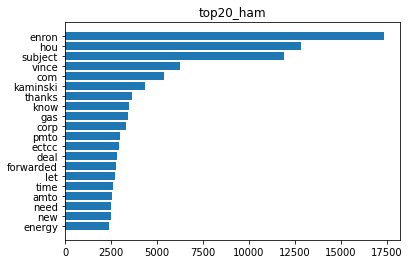

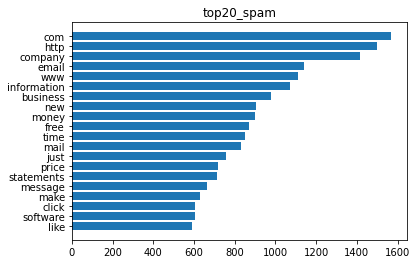

In [6]:
#用条形图表示普通邮件和垃圾邮件中的top20词语及使用次数
topN_ham_wl = []
topN_ham_count = []
topN_spam_wl = []
topN_spam_count = []
for i in range(0,20):
    topN_ham_wl.append(topN_ham[i][0])
    topN_ham_count.append(topN_ham[i][1])
    topN_spam_wl.append(topN_spam[i][0])
    topN_spam_count.append(topN_spam[i][1])

plt.title('top20_ham')
plt.barh(topN_ham_wl, topN_ham_count)
plt.show()

plt.title('top20_spam')
plt.barh(topN_spam_wl, topN_spam_count)
plt.show()

In [7]:
#求每封邮件的长度，及最长和最短的普通邮件和垃圾邮件的编号
array1 = []
max_ham = 0
min_ham = 0
for i in range(0,8033):
    array1.append(sum(x[i, :]))
    if sum(x[i, :]) > sum(x[max_ham, :]):
        max_ham = i
    if sum(x[i, :]) < sum(x[min_ham, :]):
        min_ham = i
        
array2 = []
max_spam = 8033
min_spam = 8033
for i in range(8033,x.shape[0]):
    array2.append(sum(x[i, :]))
    if sum(x[i, :]) > sum(x[max_spam, :]):
        max_spam = i
    if sum(x[i, :]) < sum(x[min_spam, :]):
        min_spam = i

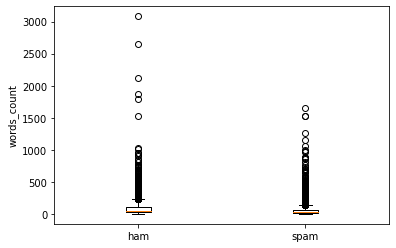

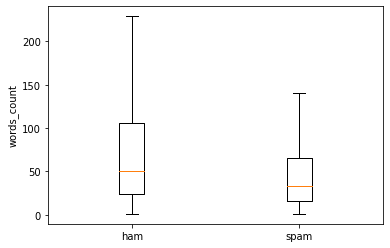

In [8]:
#用箱线图表示普通邮件和垃圾邮件的长度分布
ax = plt.subplot()
ax.boxplot([array1,array2],showfliers=True)
ax.set_xticklabels(['ham','spam'])
plt.ylabel("words_count")
plt.show()

#不显示异常值
ax = plt.subplot()
ax.boxplot([array1,array2],showfliers=False)
ax.set_xticklabels(['ham','spam'])
plt.ylabel("words_count")
plt.show()

In [9]:
print("最长的普通邮件:")
filetxt = searchHamFile(max_ham)
print(filetxt)

最长的普通邮件:
Subject: from the enron india newsdesk - april 27 th newsclips
fyi news articles from indian press .
- - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -
nikita varma
04 / 27 / 2001 07 : 51 am
to : nikita varma / enron _ development @ enron _ development
cc : ( bcc : sandeep kohli / enron _ development )
subject : from the enron india newsdesk - april 27 th newsclips
friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm
dpc board empowers md to cancel mseb contract
friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm
mseb pays rs 134 cr under ' protest ' to dpc
friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3
enron india md authorised to terminate ppa
friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl . html
f

In [10]:
print("最短的普通邮件:")
filetxt = searchHamFile(min_ham)
print(filetxt)

最短的普通邮件:
Subject: wassup ! ! ! ! ! !
- wassup . avi


In [11]:
print("最长的垃圾邮件:")
filetxt = searchSpamFile(max_spam)
print(filetxt)

最长的垃圾邮件:
Subject: industry giants can ' t match this opportunity
another ground breaking news alert from rlyc .
the potential stored - value debit card market in the united states alone is approximately 150 million people , of which only about 12 million now maintain active stored - value debit card accounts .
one company is quickly entering a $ 2 trillion market space with a proposed portfolio of product and service offerings that even the largest multi - national corporations in its industry may have a hard time matching . in just a few months , this company has begun adding and developing innovative new products and targeting acquisitions that could help it reach millions of new long - term customers that could generate tremendous re - occurring revenues for many years to come .
although you have probably never heard of this company , you may soon hear of it even if you don ' t continue reading this message . that ' s because it is making a major push to put its products in the hand

In [12]:
print("最短的垃圾邮件:")
filetxt = searchSpamFile(min_spam)
print(filetxt)

最短的垃圾邮件:
Subject: 

